In [1]:
import os
import sys
from pathlib import Path
current_dir = os.getcwd()  
source_dir  = os.path.join(current_dir, "../")
if source_dir not in sys.path:
    sys.path.insert(0, source_dir)
from pathlib import Path
import numpy as np
import lsstypes as types
from tools import get_box_stats_fn

In [2]:
stats_dir = Path('/global/cfs/cdirs/desicollab/science/gqc/y3_fits/mockchallenge_abacushf/measurements/') # job running, file will be moved to a CAI dir or FS MC dir

In [3]:
# we can specify AbacusSummit cosmology, HOD flavor, los direction, etc
fn = get_box_stats_fn(stats_dir=stats_dir, kind='mesh2_spectrum', version='v2', tracer='LRG',
                  zrange=(0.4, 0.6), cosmo='c000', hod='base_B', los='z',  imock=0)
fn

PosixPath('/global/cfs/cdirs/desicollab/science/gqc/y3_fits/mockchallenge_abacushf/measurements/v2/mesh2_spectrum_poles_LRG_z0.4-0.6_c000_base_B_losz_0.h5')

In [4]:
spectrum = types.read(fn)
print(spectrum, f"with k-average: {spectrum.get(ells=0).coords('k')}")

Mesh2SpectrumPoles(labels=[{'ells': 0}, {'ells': 2}, {'ells': 4}], size=1884) with k-average: [0.                nan        nan 0.00314159 0.00444288 0.0054414
 0.00628319 0.00736006 0.00888577 0.00965136 0.01053531 0.01161223
 0.01291015 0.01347474 0.01439454 0.01556691 0.01644228 0.01732008
 0.01840895 0.01941539 0.02032794 0.02143823 0.02251465 0.02341392
 0.02449507 0.02553011 0.02638132 0.02733187 0.02852913 0.02957491
 0.03056575 0.03140628 0.03252988 0.03369721 0.03453797 0.03551438
 0.03653316 0.03759478 0.03858392 0.03963563 0.04058527 0.04143952
 0.04249445 0.04358967 0.04452004 0.04547088 0.04652158 0.04748467
 0.04848457 0.0494829  0.05048629 0.0514399  0.05241217 0.0534839
 0.05451454 0.05552119 0.05656924 0.05751912 0.05836865 0.05943445
 0.06051272 0.06156299 0.06254451 0.06353527 0.06455786 0.06555031
 0.06653949 0.06749886 0.06849654 0.06947132 0.07051489 0.07157029
 0.07252469 0.07350064 0.07452362 0.0755584  0.07646302 0.07747281
 0.07851745 0.07947115 0.08044452 0.0

In [5]:
spectrum = spectrum.select(k=slice(0, None, 5))  # rebin to dk = 0.005 h/Mpc
spectrum = spectrum.select(k=(0., 0.4))  # select k-range
spectrum = spectrum.get(ells=[0, 2])  # monopole and quadrupole
spectrum = spectrum.at(ells=[2]).select(k=(0., 0.3))  # apply stricter k-cut to the quadrupole

for ell in spectrum.ells:
    pole = spectrum.get(ell)
    pole.coords('k')  # k-modes
    pole.value()  # value of the power spectrum multipole
    #print(pole.values('shotnoise'))  # shotnoise

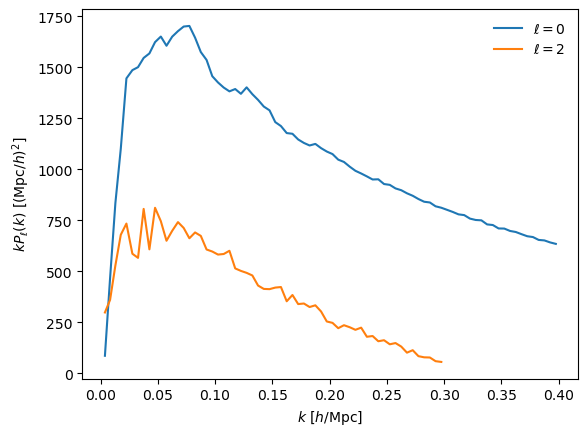

In [6]:
spectrum.plot(show=True);

In [7]:
kw = dict(version='v2', tracer='LRG',zrange=(0.4, 0.6), cosmo='c000', los='z', hod='base')
fn = get_box_stats_fn(stats_dir=stats_dir, kind='mesh3_spectrum', basis='sugiyama-diagonal', **kw, imock=0)
bispectrum = types.read(fn)
bispectrum

Mesh3SpectrumPoles(labels=[{'ells': (0, 0, 0)}, {'ells': (2, 0, 2)}], size=100)

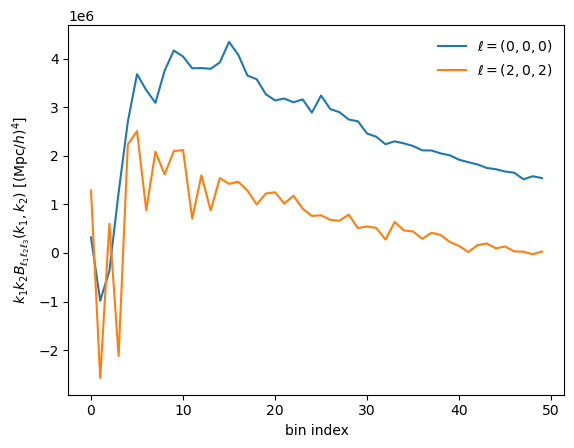

In [8]:
bispectrum.plot(show=True);

In [9]:
bispectrum.get(ells=(2, 0, 2)).coords('k') # kmax>0.22

array([[0.00379811, 0.00379811],
       [0.00829934, 0.00829934],
       [0.01293223, 0.01293223],
       [0.0176484 , 0.0176484 ],
       [0.02256549, 0.02256549],
       [0.02777644, 0.02777644],
       [0.03269805, 0.03269805],
       [0.03761648, 0.03761648],
       [0.04263844, 0.04263844],
       [0.04756514, 0.04756514],
       [0.05262096, 0.05262096],
       [0.05756032, 0.05756032],
       [0.06254738, 0.06254738],
       [0.06757793, 0.06757793],
       [0.07255917, 0.07255917],
       [0.07753384, 0.07753384],
       [0.08251793, 0.08251793],
       [0.08752752, 0.08752752],
       [0.09254702, 0.09254702],
       [0.09754963, 0.09754963],
       [0.10253196, 0.10253196],
       [0.1075116 , 0.1075116 ],
       [0.11251028, 0.11251028],
       [0.11755008, 0.11755008],
       [0.12253694, 0.12253694],
       [0.12752609, 0.12752609],
       [0.1325302 , 0.1325302 ],
       [0.13750627, 0.13750627],
       [0.14251344, 0.14251344],
       [0.14752592, 0.14752592],
       [0.

In [10]:
kw = dict(version='v2', tracer='LRG',zrange=(0.4, 0.6), cosmo='c000', los='z', hod='base')
fn = get_box_stats_fn(stats_dir=stats_dir, kind='mesh3_spectrum', basis='scoccimarro', **kw, imock=0)
bispectrum = types.read(fn)
bispectrum

Mesh3SpectrumPoles(labels=[{'ells': 0}, {'ells': 2}], size=7098)

In [11]:
bispectrum.get(ells=(0)).coords('k')

array([[0.00771755, 0.00771755, 0.00771755],
       [0.00771755, 0.01599931, 0.01599931],
       [0.00771755, 0.025733  , 0.025733  ],
       ...,
       [0.24506578, 0.25506549, 0.25506549],
       [0.24506578, 0.25506549, 0.26506866],
       [0.25506549, 0.25506549, 0.25506549]])

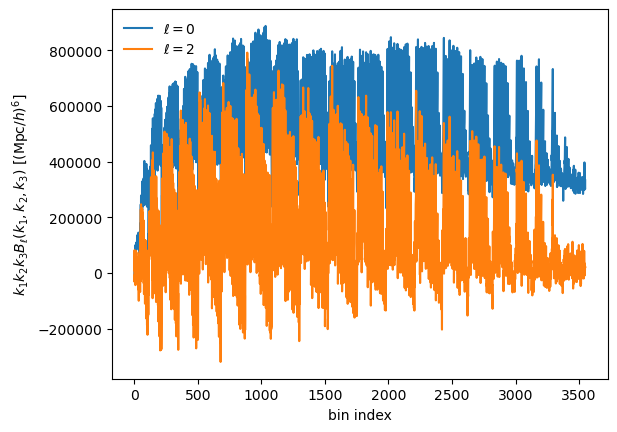

In [12]:
bispectrum.plot(show=True);